# 17_1 교차분석 연습문제
    - 압박붕대 사용에 대한 실험 연구
    - 1 : 'elastic', 2:'inelastic'
    - 1:'Yes', 2:'No"
    - 15_2.bandage.csv

## 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기 + 데이터 전처리

In [3]:
df = pd.read_csv('./data/15_2.bandage.csv', encoding = 'cp949')
df.head()

,bandage,healed,count
0,1,1,35
1,1,2,30
2,2,1,19
3,2,2,48


In [5]:
# 행, 열 개수 세기

df.shape

(4, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   bandage  4 non-null      int64
 1   healed   4 non-null      int64
 2   count    4 non-null      int64
dtypes: int64(3)
memory usage: 228.0 bytes


In [7]:
# 범주형 변수 처리

df['bandage'].replace({1:'elastic', 2:'inelastic'}, inplace = True)
df['bandage'] = df['bandage'].astype('category')

df['healed'].replace({1:'Yes', 2:'No'}, inplace = True)
df['healed'] = df['healed'].astype('category')

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_16496\1737547214.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bandage'].replace({1:'elastic', 2:'inelastic'}, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_16496\1737547214.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

,bandage,healed,count
0,elastic,Yes,35
1,elastic,No,30
2,inelastic,Yes,19
3,inelastic,No,48


### 1. 분할표

In [17]:
tab = pd.crosstab(df['bandage'],
                  df['healed'],
                  values=df['count'],
                  aggfunc='sum')

tab = tab.loc[:, ['Yes', 'No']]

tab

healed,Yes,No
bandage,,
elastic,35,30
inelastic,19,48


### 2. ch 분석

In [19]:
result = sm.stats.Table(tab)

print(result.table_orig)

healed     Yes  No
bandage           
elastic     35  30
inelastic   19  48


In [20]:
# pearson 검정

rslt = result.test_nominal_association()

print(rslt.pvalue)

0.002904802391656358


p value 가 0.02 < 0.05 이므로 차이가 있음.

In [21]:
# 표준화 잔차

result.standardized_resids

healed,Yes,No
bandage,,
elastic,2.977637,-2.977637
inelastic,-2.977637,2.977637


절대값이 2 이상이므로 차이가 있음.

### 3. 상대적 위험률

In [22]:
table = tab.to_numpy()
table

array([[35, 30],
       [19, 48]])

In [23]:
t22 = sm.stats.Table2x2(table)

print(t22.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        2.947       1.433 6.062   0.003
Log odds ratio    1.081 0.368 0.360 1.802   0.003
Risk ratio        1.899       1.220 2.955   0.004
Log risk ratio    0.641 0.226 0.199 1.083   0.004
-------------------------------------------------


- 사전설계는 Risk ratio : 1.899

    = 압박붕대를 사용한 실험군이 치료될 확률이 대조군보다 1.899배 높음.

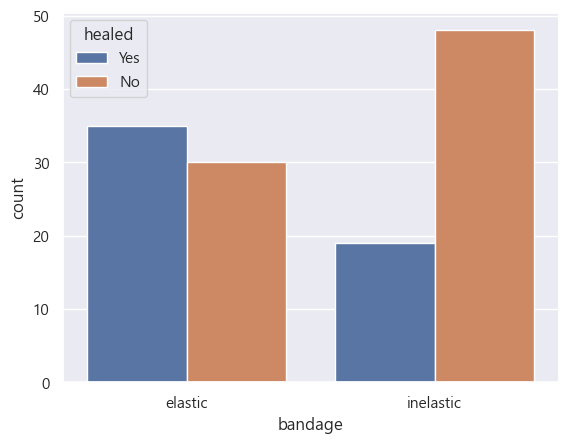

In [35]:
# 그래프

# 그래프
sns.barplot(x = 'bandage',
            y = 'count',
            hue = 'healed',
            hue_order=['Yes', 'No'],
            data = df)

plt.show()